----------

## <span style="color:green">Финальный комментарий от наставника<span>

Йей, ты сделал это! Поздравляю с завершением первого Блока. Буду скучать по твоим красивым проектам :)

Удачи в обучении и не затягивай больше со сдачей :)

![img](https://data.whicdn.com/images/268638472/large.jpg)

---------

----------

## <span style="color:green">Комментарий от наставника<span>

Привет! Коммендарии, как обычно, в таких же ячейках :)


---------

# <a name="contents">Задачи исследования — Сборный проект</a>

## [1. Откройте файл с данными и изучите общую информацию](#stage_1)
Путь к файлу:
- /datasets/games.csv
- /datasets/rating.csv — данные о рейтинге ESRB


## [2. Подготовьте данные](#stage_2)
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков
    

## [3. Проведите исследовательский анализ данных](#stage_3)
- Постройте распределение по годам релиза и опишите полученный результат
- Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
- Постройте график продаж по каждому году; сделайте вывод
- Постройте ящик с усами по глобальным продажам, опишите полученный результат
- Узнайте, на какой платформе было выпущено больше всего игр
- Определите, игр какого жанра больше всего
- Найдите игры с наибольшей и наименьшей оценкой от пользователей
- Найдите игры с наибольшей и наименьшей оценкой от критиков
- Оцените корреляцию между оценками критиков и пользовательскими оценками


## [4. Составьте портрет пользователя для каждого региона](#stage_4)
Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


## [5. Проверьте гипотезы](#stage_5)
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:
- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


## [6. Напишите общий вывод](#stage_6)
- Общие выводы
- Рекомендации

## Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год релиза
- Genre — жанр игры
- NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
- EU_players — продажи игрокам в Европе (в миллионах долларов)
- RU_players — продажи игрокам в России (в миллионах долларов)
- Other_players — продажи игрокам в других странах
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг ESRB

<a name="stage_1"></a>
# Этап 1. Откроем файлы, импортируем библиотеки
- Изучим общую информацию
- Посмотрим на оформление

[Наверх к оглавлению](#contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
games = pd.read_csv('/datasets/games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_players,EU_players,RU_players,Other_players,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_players,EU_players,RU_players,Other_players,Critic_Score
count,"16,450.00","16,719.00","16,719.00","16,719.00","16,719.00","8,137.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,020.00",41.36,28.96,10.22,10.57,98.00


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
NA_players         16719 non-null float64
EU_players         16719 non-null float64
RU_players         16719 non-null float64
Other_players      16719 non-null float64
Critic_Score       8137 non-null float64
User_Score         10015 non-null object
Rating             9950 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
rating = pd.read_csv('/datasets/rating.csv')
rating.tail()

,rating_type,decryption
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)
5,AO,Только для взрослых
6,EC,Для детей младшего возраста
7,RP,Рейтинг ожидается


In [8]:
rating.describe()

,rating_type,decryption
count,8,8
unique,8,8
top,RP,Для детей младшего возраста
freq,1,1


In [9]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
rating_type    8 non-null object
decryption     8 non-null object
dtypes: object(2)
memory usage: 208.0+ bytes


Выглядит приемлемо, нужна предобработка.

<a name="stage_2"></a>
## 2. Подготовьте данные
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

- Приведите данные к нужным типам:
    - Опишите, в каких столбцах пришлось заменить тип данных и почему
    
- Обработайте пропуски при необходимости:
    - Если вы решили заполнить пропуски определённым образом или не заполнять совсем — объясните, почему;
    - Опишите возможные причины возникновения пропусков


[Наверх к оглавлению](#contents)

In [10]:
# Заменим названия столбцов
games.columns.tolist()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_players',
 'EU_players',
 'RU_players',
 'Other_players',
 'Critic_Score',
 'User_Score',
 'Rating']

In [11]:
cols = ['game_name',
        'platform',
        'year_of_release',
        'genre',
        'na_sales',
        'eu_sales',
        'ru_sales',
        'other_sales',
        'critic_score',
        'user_score',
        'rating_type']
games.set_axis(cols, axis='columns', inplace=True)

----------

## <span style="color:green">Комментарий от наставника<span>

### Что можно сделать лучше:
* Можно автоматизировать, используя `df.columns = df.columns.str.lower`.


---------

In [12]:
rating.columns = ['rating_type', 'descryption']
rating.head()

,rating_type,descryption
0,E,Для всех
1,M,От 17 лет
2,T,Подросткам 13—19 лет
3,E10+,Для всех старше 10 лет
4,K-A,Для всех(до 1998 года)


In [13]:
# Посчитайте количество продаж во всех регионах и запишите в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['ru_sales'] + games['other_sales']
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38


In [14]:
# Приведите данные к нужным типам
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
game_name          16717 non-null object
platform           16719 non-null object
year_of_release    16450 non-null float64
genre              16717 non-null object
na_sales           16719 non-null float64
eu_sales           16719 non-null float64
ru_sales           16719 non-null float64
other_sales        16719 non-null float64
critic_score       8137 non-null float64
user_score         10015 non-null object
rating_type        9950 non-null object
total_sales        16719 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


**Вот, что нужно привести:**
- год к годам
- оценку пользователей к числам с плавающей запятой

Сотворим такую странную механику, так как по-другому года в года получить не получилось.
2077 - ~это отсылка к Киберпанку 2077~, это метка даты, которая обозначает отсутсвие даты релиза.
Проставлять какие-то левые значения не будем, так как выход одной игры на разных платформах может отличаться в 3-5 лет.

In [15]:
games['year_of_release'] = games['year_of_release'].fillna(2077)
games['year_of_release'] = games['year_of_release'].astype('int')

----------

## <span style="color:green">Комментарий от наставника<span>

Классное наблюдение про 2077. По преобразованию можно было остановиться здесь, результат такой же :)

---------

In [16]:
games['year_of_release'] = games['year_of_release'].astype('str')

In [17]:
games['sample_date'] = '-01-01'

In [18]:
games['year_of_release'] = games['year_of_release'] + games['sample_date']

In [19]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,sample_date
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,-01-01
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24,-01-01
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,-01-01
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77,-01-01
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38,-01-01


In [20]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,sample_date
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54,-01-01
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN,40.24,-01-01
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52,-01-01
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77,-01-01
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN,31.38,-01-01


In [21]:
del games['sample_date']

In [22]:
games['year_of_release'].max()

2077

![You are breathtaking](https://s3.amazonaws.com/prod-media.gameinformer.com/styles/thumbnail/s3/2019/06/11/601d8dce/cyberpunk2077-you_look_like_youve_seen_a_ghost-rgb-en.jpeg)

In [23]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
# tbd мешает приведению к точке с плавающей запятой, посмотрим подробнее
games[games['user_score'] == 'tbd']['user_score'].count()

2425

In [25]:
# Так как это что-то неочевидное и связано с обновлением базы — есть tbd и с 2001 и с 2010 годом, то проставим np.nan
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

In [26]:
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 12 columns):
game_name          16717 non-null object
platform           16719 non-null object
year_of_release    16719 non-null int64
genre              16717 non-null object
na_sales           16719 non-null float64
eu_sales           16719 non-null float64
ru_sales           16719 non-null float64
other_sales        16719 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating_type        9950 non-null object
total_sales        16719 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
# До кучи проставим строчные буквы в именных столбцах
games['game_name'] = games['game_name'].str.lower()
games['platform'] = games['platform'].str.lower()
games['genre'] = games['genre'].str.lower()
games['rating_type'] = games['rating_type'].str.lower()

In [28]:
rating['rating_type'] = rating['rating_type'].str.lower()
rating['descryption'] = rating['descryption'].str.lower()

In [29]:
# Обработайте пропуски при необходимости
games.duplicated().sum()

0

In [30]:
games.isnull().sum().sort_values(ascending = False) / games.shape[0] * 100

user_score        54.60
critic_score      51.33
rating_type       40.49
genre              0.01
game_name          0.01
total_sales        0.00
other_sales        0.00
ru_sales           0.00
eu_sales           0.00
na_sales           0.00
year_of_release    0.00
platform           0.00
dtype: float64

Заполним оценки нулями, так как не известны причины отсутствия рейтинга. 
Даже если предположить, что на одной платформе игра вышла крутой, то совершенно необязательно она выйдет крутой на другой платформе.

У безымянок есть деньги, оставим в живых.

Игры на разных платформах могут отличаться рейтингом. Даже могут отличаться контентом, поэтому поставим всем общую группу "Вне рейтинга".

In [31]:
games['user_score'] = games['user_score'].fillna(-1)
games['critic_score'] = games['critic_score'].fillna(-1)
games['rating_type'] = games['rating_type'].fillna('out of rating')
games['genre'] = games['genre'].fillna('no genre game')
games['game_name'] = games['game_name'].fillna('no name game')

----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* В out ячейки [23] видно, что существует реальный пользовательский рейтинг 0. В твоем варианте заполнения смешались пропуски и реальные оценки 0. Замени заполнение нулем на другое значение, например, -1. Либо не заполняй совсем.

---------

Заменил, точно.

In [32]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1.00,-1.00,out of rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1.00,-1.00,out of rating,31.38


<a name="stage_3"></a>
## 3. Проведите исследовательский анализ данных
1. Постройте распределение по годам релиза и опишите полученный результат
2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод
3. Постройте график продаж по каждому году; сделайте вывод
4. Постройте ящик с усами по глобальным продажам, опишите полученный результат
5. Узнайте, на какой платформе было выпущено больше всего игр
6. Определите, игр какого жанра больше всего
7. Найдите игры с наибольшей и наименьшей оценкой от пользователей
8. Найдите игры с наибольшей и наименьшей оценкой от критиков
9. Оцените корреляцию между оценками критиков и пользовательскими оценками

[Наверх к оглавлению](#contents)

### 1. Постройте распределение по годам релиза и опишите полученный результат

Text(0.5, 1.0, 'Распределение по годам релиза')

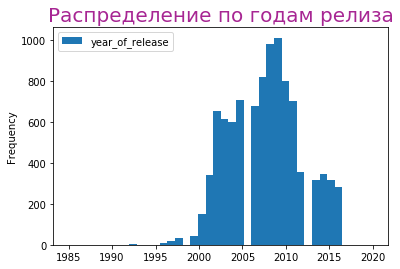

In [65]:
ax = games[games['year_of_release'] != 2077]['year_of_release'].plot(kind='hist', bins=40).legend()
plt.title('Распределение по годам релиза', fontdict=font)

Появились в 80-ых, затем было долго плато — мощностей не хватало, а на текстовых квестах много не заработаешь.
С 95-года росли чипы видеоадаптеров в мощности, соответственно график релизов тоже рос. С 2010 года спад, насыщение рынка, переход на мобильные платформы, ну и, видимо, инвесторы рисковать перестали.

### 2. Постройте распределение по годам релиза для игр с отзывом и без отзыва; cравните полученные распределения и сделайте вывод

Text(0.5, 1.0, 'Отзывы и без отзыва — критики')

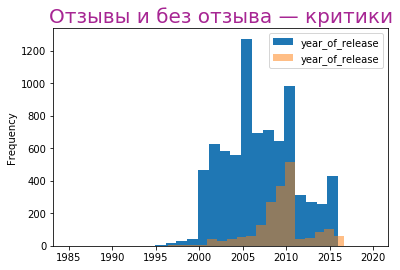

In [73]:
games[(games['year_of_release'] != 2077) & (games['critic_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['critic_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — критики', fontdict=font)

Text(0.5, 1.0, 'Отзывы и без отзыва — пользователи')

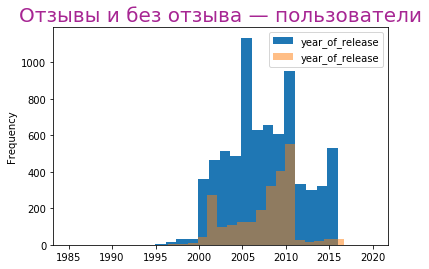

In [72]:
games[(games['year_of_release'] != 2077) & (games['user_score'] > 0)]['year_of_release'].plot(kind='hist', bins=25).legend()
games[(games['year_of_release'] != 2077) & (games['user_score'] == -1)]['year_of_release'].plot(kind='hist', bins=25, alpha=0.5).legend()
plt.title('Отзывы и без отзыва — пользователи', fontdict=font)

Выглядят похожими между собой. Скорее всего, из-за того, что чаще всего критикам выгодно сходится с мнением пользователей.

----------

## <span style="color:green">Комментарий от наставника<span>

### Что можно сделать лучше:
* На график для читабельности нужно добавить легенду.

---------

### 3. Постройте график продаж по каждому году; сделайте вывод

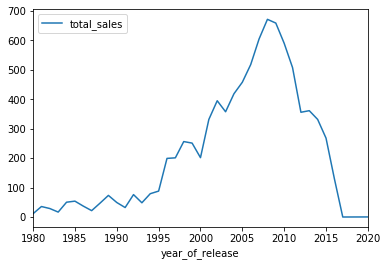

In [36]:
games[games['year_of_release'] != 2077].groupby('year_of_release').agg({'total_sales':'sum'}).plot()

Игровой рынок сдувается с 2008 года.

### 4. Постройте ящик с усами по глобальным продажам, опишите полученный результат

In [37]:
games.describe()

,year_of_release,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,total_sales
count,"16,719.00","16,719.00","16,719.00","16,719.00","16,719.00","16,719.00","16,719.00","16,719.00"
mean,"2,007.62",0.26,0.15,0.08,0.05,33.05,2.69,0.53
std,10.62,0.81,0.50,0.31,0.19,36.30,4.17,1.55
min,"1,980.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,008.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,011.00",0.24,0.11,0.04,0.03,70.00,7.30,0.47
max,"2,077.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


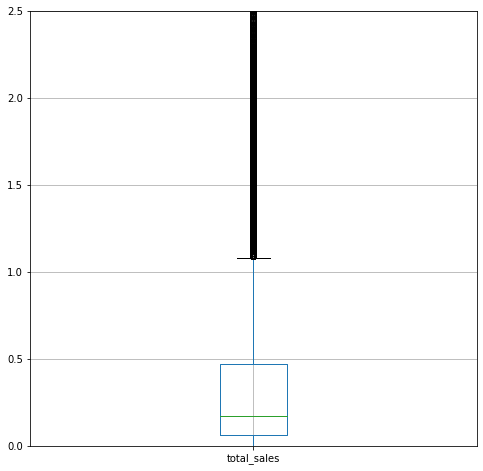

In [38]:
plot = games.boxplot('total_sales', figsize=(8, 8)).set_ylim(0, 2.5)

Все или ничего, в общем обычная судьба игроделов - выпустить какую-нибудь игру и заработать на этом немного деньжат, не факт, что не в минус. Но игровые конгломераты не дремлют и устраивают AAA-выбросы рынку.

### 5. Узнайте, на какой платформе было выпущено больше всего игр

In [39]:
most_popular_platform = games.groupby('platform').agg({'game_name':'count'}).reset_index()
most_popular_platform.sort_values(by='game_name', ascending=False).head()

,platform,game_name
16,ps2,2161
4,ds,2152
17,ps3,1331
25,wii,1320
28,x360,1262


Плейстейшн 2 побеждает.

## 6. Определите, игр какого жанра больше всего

In [40]:
most_popular_genre = games.groupby('genre').agg({'game_name':'count'}).reset_index()
most_popular_genre.sort_values(by='game_name', ascending=False).head()

,genre,game_name
0,action,3370
11,sports,2348
3,misc,1750
8,role-playing,1500
9,shooter,1323


Экшен победил.

## 7. Найдите игры с наибольшей и наименьшей оценкой:
- от пользователей
- от критиков


Оцените корреляцию между оценками критиков и пользовательскими оценками

In [41]:
games[games['user_score'] > 0].sort_values(by='user_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
13683,myth makers: trixie in toyland,wii,2008,platform,0.04,0.00,0.00,0.00,-1.00,0.20,e,0.04
9971,madden nfl 17,ps3,2016,sports,0.07,0.02,0.00,0.02,-1.00,0.20,e,0.11
5764,happy feet,ds,2006,action,0.27,0.01,0.00,0.02,-1.00,0.30,e,0.30
13381,billy the wizard: rocket broomstick racing,wii,2007,racing,0.04,0.00,0.00,0.00,-1.00,0.30,e,0.04
10263,charlie and the chocolate factory,xb,2005,adventure,0.08,0.02,0.00,0.00,39.00,0.50,e,0.10


In [42]:
games[games['user_score'] > 0].sort_values(by='user_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
14414,breath of fire iii,psp,2005,role-playing,0.00,0.02,0.00,0.01,-1.00,9.70,t,0.03
8976,boktai: the sun is in your hand,gba,2003,role-playing,0.10,0.04,0.00,0.00,83.00,9.60,e,0.14
3417,harvest moon: friends of mineral town,gba,2003,simulation,0.34,0.13,0.11,0.01,81.00,9.60,e,0.59
11120,super puzzle fighter ii,gba,2077,puzzle,0.06,0.02,0.00,0.00,83.00,9.50,e,0.08
10106,cory in the house,ds,2007,action,0.10,0.00,0.00,0.01,-1.00,9.50,e,0.11


In [43]:
games[games['critic_score'] > 0].sort_values(by='critic_score').head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
13690,ride to hell,ps3,2013,racing,0.02,0.01,0.00,0.01,13.00,1.00,m,0.04
10663,leisure suit larry: box office bust,ps3,2009,adventure,0.06,0.03,0.00,0.01,17.00,1.70,m,0.10
12823,ride to hell,x360,2013,racing,0.04,0.01,0.00,0.01,19.00,1.30,m,0.06
10016,rugby 15,ps4,2015,sports,0.04,0.06,0.00,0.02,19.00,3.40,e,0.12
15345,balls of fury,wii,2007,sports,0.02,0.00,0.00,0.00,19.00,2.80,e10+,0.02


In [44]:
games[games['critic_score'] > 0].sort_values(by='critic_score', ascending = False).head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales
227,tony hawk's pro skater 2,ps,2000,sports,3.05,1.41,0.02,0.20,98.00,7.70,t,4.68
57,grand theft auto iv,ps3,2008,action,4.76,3.69,0.44,1.61,98.00,7.50,m,10.50
51,grand theft auto iv,x360,2008,action,6.76,3.07,0.14,1.03,98.00,7.90,m,11.00
5350,soulcalibur,dc,1999,fighting,0.00,0.00,0.34,0.00,98.00,8.80,t,0.34
165,grand theft auto v,xone,2014,action,2.81,2.19,0.00,0.47,97.00,7.90,m,5.47


In [101]:
critic_score = games[games['critic_score'] != -1]
user_score = games[games['user_score'] != -1]

In [102]:
corr_df = pd.DataFrame()
corr_df['critic_score'] = critic_score['critic_score']
corr_df['user_score'] = user_score['user_score']

,critic_score,user_score
0,76.00,8.00
1,82.00,8.30
2,80.00,8.00
3,89.00,8.50
4,58.00,6.60
5,87.00,8.40
6,91.00,8.60
7,80.00,7.70
8,61.00,6.30
9,80.00,7.40


13.0

In [104]:
corr = corr_df[['critic_score', 'user_score']].corr()
corr.style.format("{:.2%}")

,critic_score,user_score
critic_score,100.00%,58.21%
user_score,58.21%,100.00%


----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* До расчёта корреляции нужно отфильтровать строки с заполненными пропусками. Заполнение искажает результат корреляции.

---------

In [105]:
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score
critic_score,1,0.582061
user_score,0.582061,1


В общем, по-прежнему, сильная корреляция есть. ~Журналисты — продажные, игроки — токсичные.~

<a name="stage_4"></a>
## 4. Составьте портрет пользователя для каждого региона
Для пользователей каждого региона (Северная Америка, Европа и Россия) определите:
- топ-5 предпочтительных жанров
- в какие года пользователи были наиболее активны (больше всего покупали игры)
- топ-5 предпочтительных платформ
- какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)


[Наверх к оглавлению](#contents)

### Топ-5 предпочтительных жанров

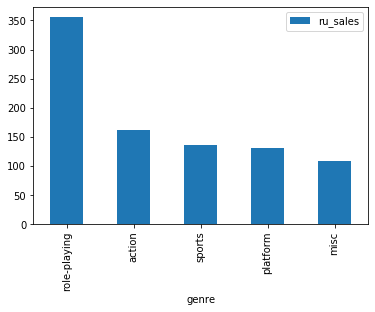

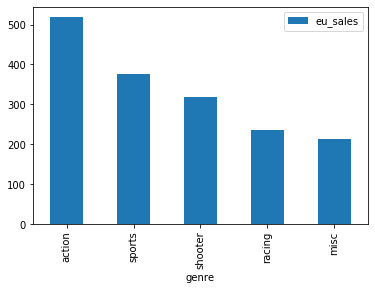

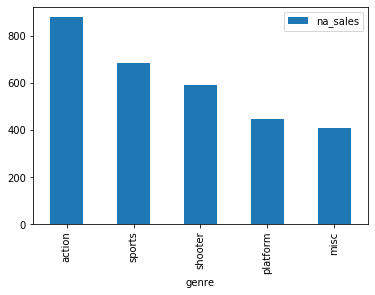

In [47]:
games.groupby(by='genre').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В РФ предпочитают ролевые игры, когда как в Европе и Северной Америке больше средств тратят на экшены.

### В какие года пользователи были наиболее активны (больше всего покупали игры)

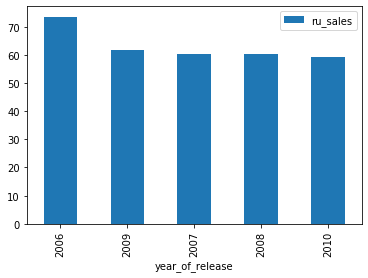

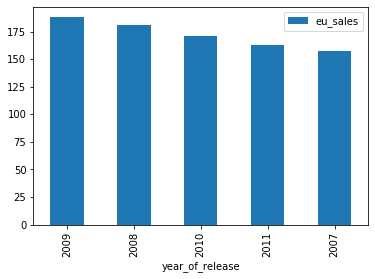

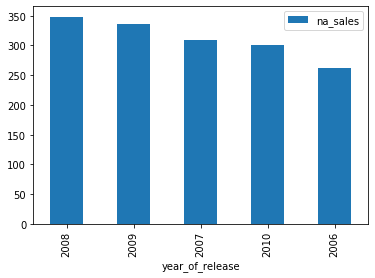

In [48]:
games.groupby(by='year_of_release').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='year_of_release').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

В общем, когда рынок игровой рос, вот тогда все и покупали игры. +/- глобальный кризис.

### Какой рейтинг ESRB встречается чаще всего (наиболее частотная категория)

In [49]:
games = games.merge(rating, on='rating_type', how='right')

In [50]:
games.head()

,game_name,platform,year_of_release,genre,na_sales,eu_sales,ru_sales,other_sales,critic_score,user_score,rating_type,total_sales,descryption
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,e,82.54,для всех
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,e,35.52,для всех
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,e,32.77,для всех
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,e,29.80,для всех
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,e,28.91,для всех


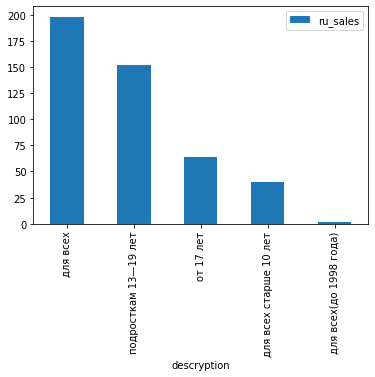

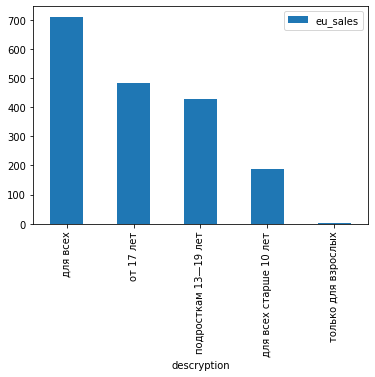

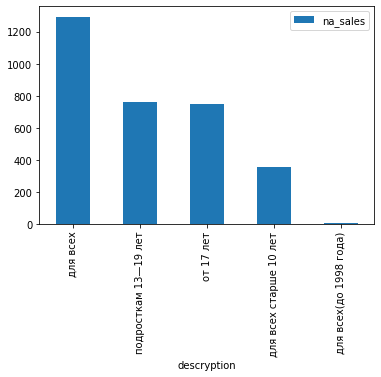

In [51]:
games.groupby(by='descryption').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='descryption').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='descryption').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

Группа для всех — лидер в Европе, РФ и США. Логично, так как название группы предполагает максимальный охват.
Дальше начинаются различия.

**В США:** 13-19 лет и 17 лет делят второе и третье место и группы примерно равны между собой.

**В Европе:** 17 и 13-19 лет занимают второе и третье соответственно и группы также примерно равны между собой.

**В РФ:** 13-19 лет и 17 лет делят второе и третье место. И группа в 13-19 лет крупнее более, чем в два раза.

----------

## <span style="color:green">Комментарий от наставника<span>

### Что нужно доработать:
* Добавь вывод :)

---------

### Топ-5 предпочтительных платформ

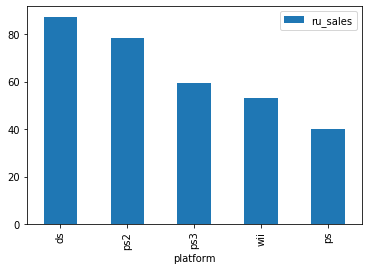

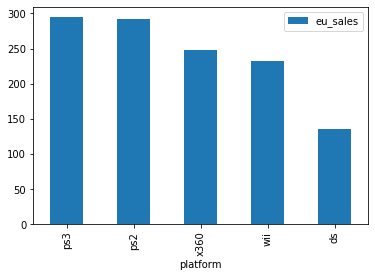

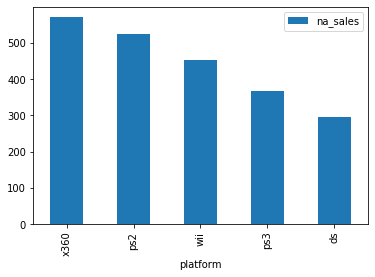

In [52]:
games.groupby(by='platform').agg({'ru_sales':'sum'}).sort_values(by='ru_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar')

На родине Майкрософта доминирует он же. Европа любит приставку Японии. Россия играет в денди.

<a name="stage_5"></a>
## 5. Проверьте гипотезы
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
- средний пользовательский рейтинг жанров Action и Sports различается

Пороговое значение alpha задайте самостоятельно.

Поясните:

- как вы формулировали нулевую и альтернативную гипотезы
- какой критерий использовали для проверки гипотез и почему


[Наверх к оглавлению](#contents)

Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой.

### **Гипотезы:**
- H0: средний пользовательский рейтинг платформ PS2 и PS3 одинаковый
- H1: средний пользовательский рейтинг платформ PS2 и PS3 различается

In [53]:
alpha = 0.05

In [54]:
ps2 = games[(games['platform'] == 'ps2') & (games['user_score'] > 0)]['user_score']
ps3 = games[(games['platform'] == 'ps3') & (games['user_score'] > 0)]['user_score']

In [55]:
results = st.ttest_ind(ps2, ps3)

In [56]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8164610454202393e-47
Отвергаем нулевую гипотезу


### **Гипотезы:**
- H0: средний пользовательский рейтинг жанров Action и Sports одинаковый 
- H1: средний пользовательский рейтинг жанров Action и Sports различается

In [57]:
action = games[(games['genre'] == 'action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'sports') & (games['user_score'] > 0)]['user_score']

In [58]:
results = st.ttest_ind(action, sports)

In [59]:
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.16924497469003613
Не получилось отвергнуть нулевую гипотезу


<a name="stage_6"></a>
## 6. Напишите общий вывод
Геймдев выглядит печально уж 10 лет как. Тем не менее люди играть не перестали и разработчики тоже выпускают игры, хотя делают это более осмотрительно. Ну и россиянам ролевые игры нравятся.
 
### Рекомендации
- ~Поменьше лутбоксов~
- Склеить наборы данных с играми и рейтингами
- Указывать источники отзывов, заполнять набор данных без пропусков 
- Перед тем, как начать делать игру искать спонсора или инвестора


[Наверх к оглавлению](#contents)

----------

## <span style="color:green">Комментарий от наставника<span>

Хороший проект, сделай несколько исправлений и скорее шли назад. Осталось совсем немного :)

---------